In [1]:
from collections import Counter
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
from bioinformatics import na_read
from bioinformatics import KmerVectors as kvec
from bioinformatics import NCBIDataset as nds
from bioinformatics import FASTADataset as fads

In [3]:
#RDP_PATH="../data/bioinformatics/rdp/202208/"
#!ls -al $RDP_PATH
RAND_PATH="../data/bioinformatics/"

In [4]:
#!ls -al $RDP_PATH
#archaea_file = RDP_PATH + "current_Archaea_unaligned.fa"
#bacteria_file = RDP_PATH + "current_Bacteria_unaligned.fa"
#fungi_file = RDP_PATH + "current_Fungi_unaligned.fa"
#!ls -al $archaea_file

random1_file = RAND_PATH + "random-1.fa"
random2_file = RAND_PATH + "random-2.fa"

In [5]:
#archaea_fads = fads.FASTADataset('archaea', archaea_file)
#print(f'archaea: [{len(archaea_fads.fasta_dataset)}]')
#archaea.fasta_dataset
#bacteria_fads = fads.FASTADataset('bacteria', bacteria_file)
#print(f'bacteria: [{len(bacteria_fads.fasta_dataset)}]')
#fungi_fads = fads.FASTADataset('fungi', fungi_file)
#print(f'fungi: [{len(fungi_fads.fasta_dataset)}]')
random1_fads = fads.FASTADataset('random-1', random1_file)
random2_fads = fads.FASTADataset('random-2', random2_file)

In [6]:
#kv = kvec.KmerVectors(['A','G','C','T'], 8, fastadatasets=[archaea_fads, fungi_fads])
#kv = kvec.KmerVectors(['A','G','C','T'], 8, fastadatasets=[archaea_fads, bacteria_fads])
kv = kvec.KmerVectors(['A','G','C','T'], 8, fastadatasets=[random1_fads, random2_fads])
print(kv.labels)

KmerVectors Object -
alphabet [['A', 'G', 'C', 'T']]
dict: [['AAAAAAAA', 'AAAAAAAG', 'AAAAAAAC', 'AAAAAAAT']]...[['TTTTTTTA', 'TTTTTTTG', 'TTTTTTTC', 'TTTTTTTT']]
Labels: [{'random-1': 1, 'random-2': 2}]
[random-1]
[../data/bioinformatics/random-1.fa]
[random-2]
[../data/bioinformatics/random-2.fa]
{'random-1': 1, 'random-2': 2}


In [7]:
d = kv.seq2KmerSentences(base_count_max=4, length_min=1400, dataset_limit=10000)

FASTA Dataset
fasta dataset: [random-1]
10002000300040005000600070008000900010000-
Total:                [10000]
Using :               [10000]
skip_count_minlength: [0]
skip_count_alphabet: [0]
fasta dataset: [random-2]
10002000300040005000600070008000900010000-
Total:                [10000]
Using :               [10000]
skip_count_minlength: [0]
skip_count_alphabet: [0]


In [8]:
df=pd.DataFrame(data=d)
df

,v1,v2
0,random-1,GCGCTTCA CGCTTCAC GCTTCACA CTTCACAC TTCACACC T...
1,random-1,TTTCCCTG TTCCCTGC TCCCTGCG CCCTGCGG CCTGCGGG C...
2,random-1,ACACACAC CACACACC ACACACCG CACACCGA ACACCGAG C...
3,random-1,TCTTATGT CTTATGTC TTATGTCT TATGTCTC ATGTCTCT T...
4,random-1,CTTACAGA TTACAGAT TACAGATA ACAGATAG CAGATAGT A...
...,...,...
19995,random-2,TAGTCAAA AGTCAAAA GTCAAAAT TCAAAATA CAAAATAG A...
19996,random-2,GAGACGCT AGACGCTT GACGCTTT ACGCTTTA CGCTTTAG G...
19997,random-2,AAAGTGGC AAGTGGCA AGTGGCAT GTGGCATC TGGCATCG G...
19998,random-2,ACAATACC CAATACCC AATACCCT ATACCCTA TACCCTAC A...


In [9]:
df.groupby('v1').count()

,v2
v1,
random-1,10000
random-2,10000


In [10]:
df = df.sample(frac=1).reset_index(drop=True)
df

,v1,v2
0,random-1,TGGGCGTT GGGCGTTC GGCGTTCA GCGTTCAA CGTTCAAC G...
1,random-2,CGCAACCC GCAACCCT CAACCCTA AACCCTAG ACCCTAGT C...
2,random-1,TGTCGCCT GTCGCCTA TCGCCTAC CGCCTACG GCCTACGT C...
3,random-2,TTGGAGCT TGGAGCTC GGAGCTCT GAGCTCTC AGCTCTCA G...
4,random-2,CTCTTGCT TCTTGCTG CTTGCTGC TTGCTGCC TGCTGCCG G...
...,...,...
19995,random-2,GTGCGTCG TGCGTCGC GCGTCGCC CGTCGCCG GTCGCCGT T...
19996,random-2,AAGGCTTT AGGCTTTG GGCTTTGA GCTTTGAG CTTTGAGG T...
19997,random-1,CGATATTA GATATTAC ATATTACA TATTACAT ATTACATA T...
19998,random-1,TGTACTCA GTACTCAA TACTCAAC ACTCAACA CTCAACAG T...


In [11]:
df.groupby('v1').count()

,v2
v1,
random-1,10000
random-2,10000


/home/dave/anaconda3/envs/capstone/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Samples by Label')

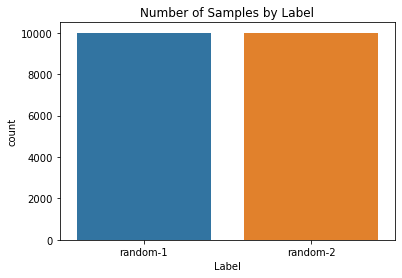

In [12]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of Samples by Label')

* Create input and output vectors.
* Process the labels.

In [13]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

Split into training and test data.

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.85)

In [28]:
print(f'X_train len: [{len(X_train)}]')
print(f'y_train len: [{len(Y_train)}]')

print(f'X_test len: [{len(X_test)}]')
print(f'y_test len: [{len(Y_test)}]')


X_train len: [3000]
y_train len: [3000]
X_test len: [17000]
y_test len: [17000]


In [15]:
Y_test

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

### Process the data
* Tokenize the data and convert the text to sequences.
* Add padding to ensure that all the sequences have the same shape.
* There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.

In [16]:
max_words = 100
#max_words = 1000
max_len = 1000
#max_len = 1000
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [17]:
#sequences_matrix[1]

### RNN
Define the RNN structure.

In [17]:
#tf.keras.layers.Embedding(
#    input_dim,
#    output_dim,
#    embeddings_initializer="uniform",
#    embeddings_regularizer=None,
#    activity_regularizer=None,
#    embeddings_constraint=None,
#    mask_zero=False,
#    input_length=None,
#    **kwargs
#)
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
#    layer = Embedding(max_words,5000,input_length=max_len)(inputs)
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

Call the function and compile the model.

In [18]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy'])

2022-09-01 16:11:50.674856: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 1000)]            0         
                                                                 
 embedding (Embedding)       (None, 1000, 50)          5000      
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [19]:
#history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
#          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
#history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
#          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss')])
history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.4,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
#history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
#          validation_split=0.2,callbacks=[])

Epoch 1/10
15/15 [==============================] - 16s 922ms/step - loss: 0.6929 - accuracy: 0.5239 - val_loss: 0.6949 - val_accuracy: 0.4817
Epoch 2/10
15/15 [==============================] - 13s 906ms/step - loss: 0.6925 - accuracy: 0.5200 - val_loss: 0.6933 - val_accuracy: 0.4875


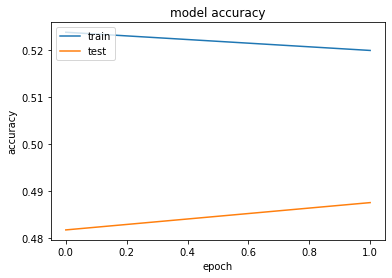

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

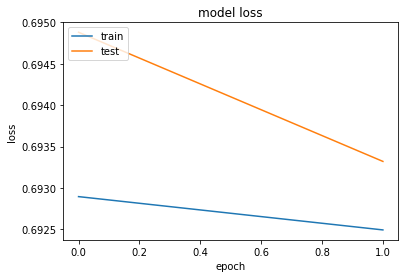

In [21]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [23]:
accr = model.evaluate(test_sequences_matrix,Y_test)

532/532 [==============================] - 51s 95ms/step - loss: 0.6932 - accuracy: 0.4995


In [24]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.693
  Accuracy: 0.500


In [25]:
accr

[0.6932474374771118, 0.4995294213294983]

In [26]:
print(f'train size: [{len(X_train)}]')
print(f'test size:  [{len(X_test)}]')

train size: [3000]
test size:  [17000]
